# **Car Price Prediction**

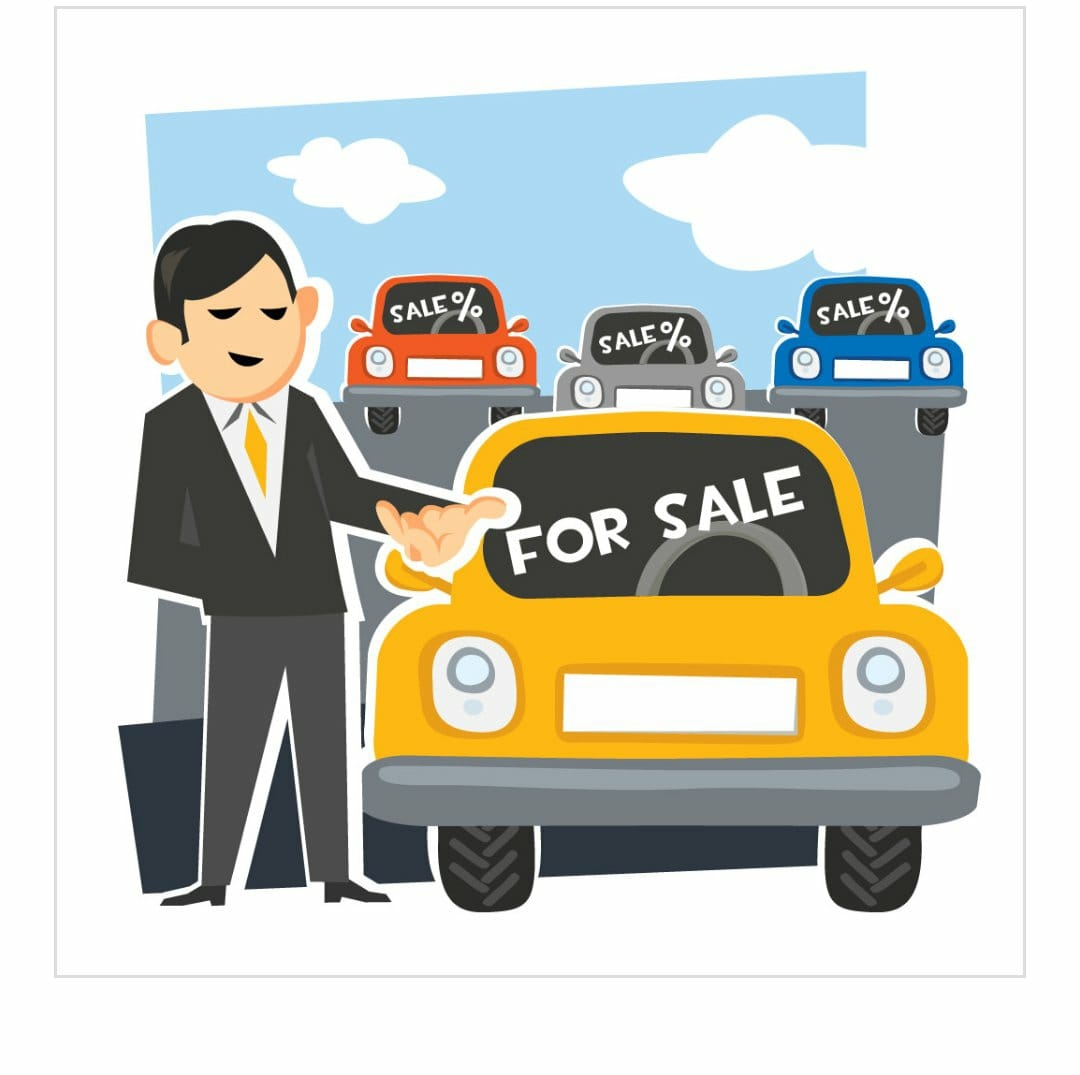

# **Business Goal**

We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [55]:
# used for numerical operations
import numpy as np
# for data manipulation
import pandas as pd
# for data vizulization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
# for visualizing missing/null values in our data frame
import missingno as msno
# for manipulation of data with type datetime
from datetime import datetime
# used to remove warnings for better asthetics
import warnings
warnings.filterwarnings('ignore')
# to increase the number of visible columns in our data frame
from google.colab.data_table import DataTable
DataTable.max_columns = 30

#SKLEARN#
# preprocessing technique in scikit-learn that scales the features of a dataset to have zero mean and unit variance.
from sklearn.preprocessing import StandardScaler
# preprocessing technique in scikit-learn that converts categorical variables into numerical values using one-hot encoding.
from sklearn.preprocessing import OneHotEncoder
# function in scikit-learn that splits a dataset into training and testing sets for machine learning model evaluation.
from sklearn.model_selection import train_test_split
# method in scikit-learn for hyperparameter tuning that performs randomized search over specified parameter values for an estimator.
from sklearn.model_selection import RandomizedSearchCV
# method in scikit-learn for hyperparameter tuning that performs exhaustive search over specified parameter values for an estimator.
from sklearn.model_selection import GridSearchCV
# function in scikit-learn that performs k-fold cross-validation for model evaluation, returning an array of scores for each fold.
from sklearn.model_selection import cross_val_score
# linear regression model in scikit-learn that predicts the target variable based on linear relationship between input features and target.
from sklearn.linear_model import LinearRegression
# it is a linear regression model in scikit-learn that performs L2 regularization to prevent overfitting.
from sklearn.linear_model import Ridge
# a linear regression model in scikit-learn that performs L1 regularization to prevent overfitting and feature selection.
from sklearn.linear_model import Lasso
#  module in scikit-learn that provides various evaluation metrics for model performance, such as accuracy, precision, recall, and F1-score.
from sklearn import metrics
# metric in scikit-learn that calculates the coefficient of determination (R2) to evaluate the goodness-of-fit of a regression model.
from sklearn.metrics import r2_score
# it is a metric in scikit-learn that calculates the mean squared error (MSE) between predicted and actual values to evaluate the performance of a regression model.
from sklearn.metrics import mean_squared_error


In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
# Load Dataset
car = pd.read_csv('/content/drive/MyDrive/car_preddiction.csv', header= 0,encoding= 'unicode_escape')
car.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [58]:
#To get no. of rows and columns in the dataset
car.shape

(205, 26)

In [59]:
#info of dataset
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [60]:
#Summary statistics of Iris dataset
car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [61]:
# Dropping duplicate values if any present in our dataframe meanwhile retaining the first value
iris=car.drop_duplicates(keep='first')

In [62]:
# Dataset Duplicate Value Count
iris.duplicated().sum()

0

In [63]:
# Missing Values/Null Values Count
iris.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

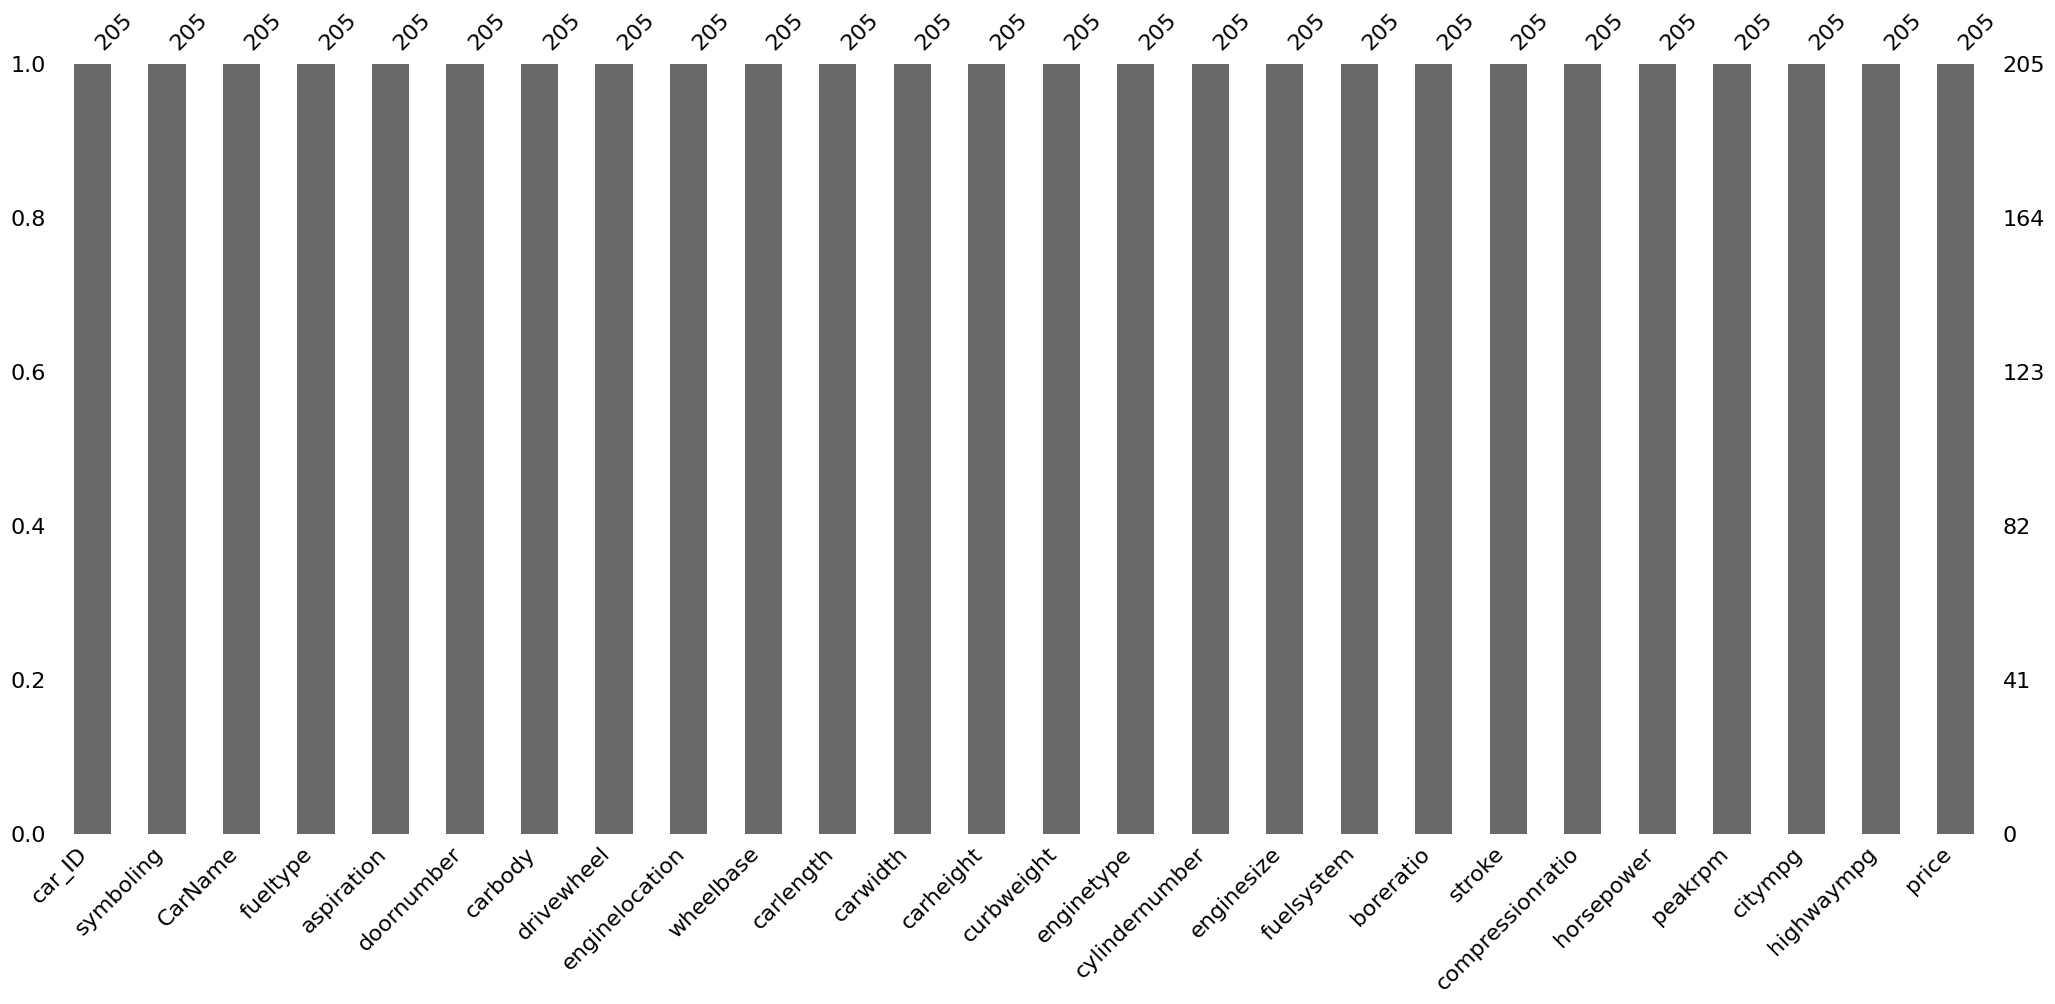

In [64]:
# Let's plot all the null values present in our dataframe using bargraph and missingno library
plt.figure(figsize=(10,8)) # used to provide a specific size to our graph
msno.bar(iris);

In [65]:
# Check Unique Values for each variable.
def unique_values(df):
    for col in df.columns:
        unique_count = df[col].nunique()
        a=print(f"COLUMN NAME ({col}): {unique_count} unique values")
    return a
unique_values(car)

COLUMN NAME (car_ID): 205 unique values
COLUMN NAME (symboling): 6 unique values
COLUMN NAME (CarName): 147 unique values
COLUMN NAME (fueltype): 2 unique values
COLUMN NAME (aspiration): 2 unique values
COLUMN NAME (doornumber): 2 unique values
COLUMN NAME (carbody): 5 unique values
COLUMN NAME (drivewheel): 3 unique values
COLUMN NAME (enginelocation): 2 unique values
COLUMN NAME (wheelbase): 53 unique values
COLUMN NAME (carlength): 75 unique values
COLUMN NAME (carwidth): 44 unique values
COLUMN NAME (carheight): 49 unique values
COLUMN NAME (curbweight): 171 unique values
COLUMN NAME (enginetype): 7 unique values
COLUMN NAME (cylindernumber): 7 unique values
COLUMN NAME (enginesize): 44 unique values
COLUMN NAME (fuelsystem): 8 unique values
COLUMN NAME (boreratio): 38 unique values
COLUMN NAME (stroke): 37 unique values
COLUMN NAME (compressionratio): 32 unique values
COLUMN NAME (horsepower): 59 unique values
COLUMN NAME (peakrpm): 23 unique values
COLUMN NAME (citympg): 29 uniq

In [66]:
# function for selecting all the numerical columns
def numerical_col(df):
  c = []
  for col in df.columns:
    if df[col].dtype =='int' or df[col].dtype =='float':
       c.append(col)
  return c
numerical_col(car)

['car_ID',
 'symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [67]:
# function for selecting all the categorical columns
def categorical_col(df):
  d = []
  for col in df.columns:
    if df[col].dtype == 'O':
       d.append(col)
  return d

In [68]:
categorical_col(car)

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [69]:
# function for outlier removal using IQR method
def remove_outliers_iqr(df, columns):

    for col in columns:
        if df[col].dtype != 'object':
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1

            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

In [70]:
car=remove_outliers_iqr(car,numerical_col(car))


In [71]:
# writing a function to detect outliers using boxplot
def outlier_detection(df):
      for column in df.columns:
        plt.figure(figsize=(10, 6))  # figure size
        plt.boxplot(df[column])  # Generate the box plot
        plt.title(f'Outliers for {column}')  # Set the title
        plt.xlabel(column)  # Set the x-axis label
        plt.ylabel('Value ----->')  # Set the y-axis label
        plt.show()

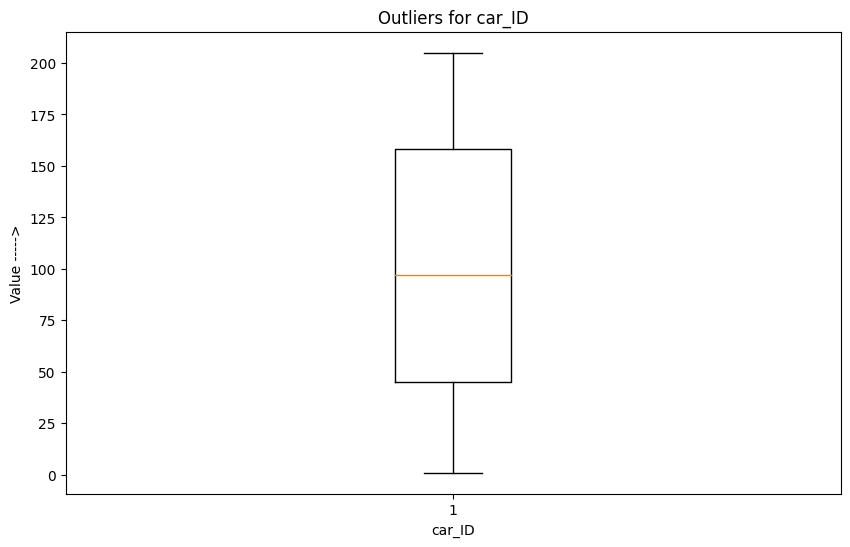

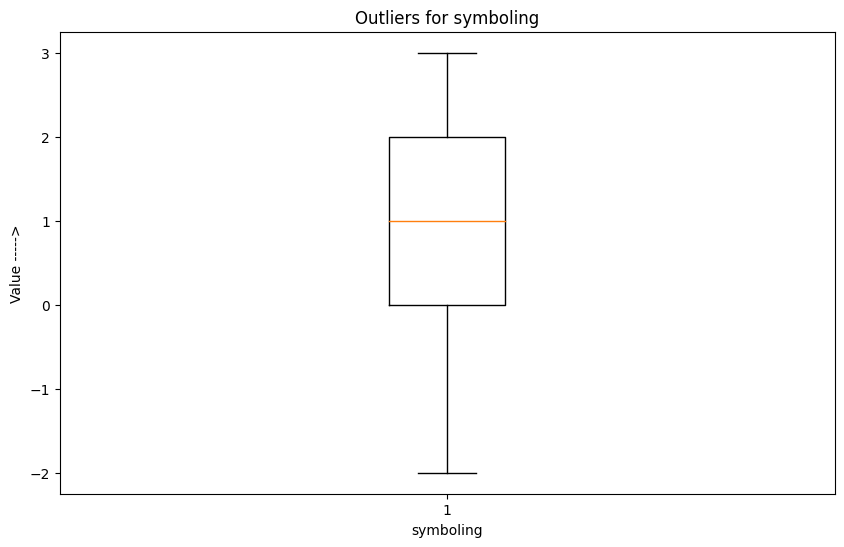

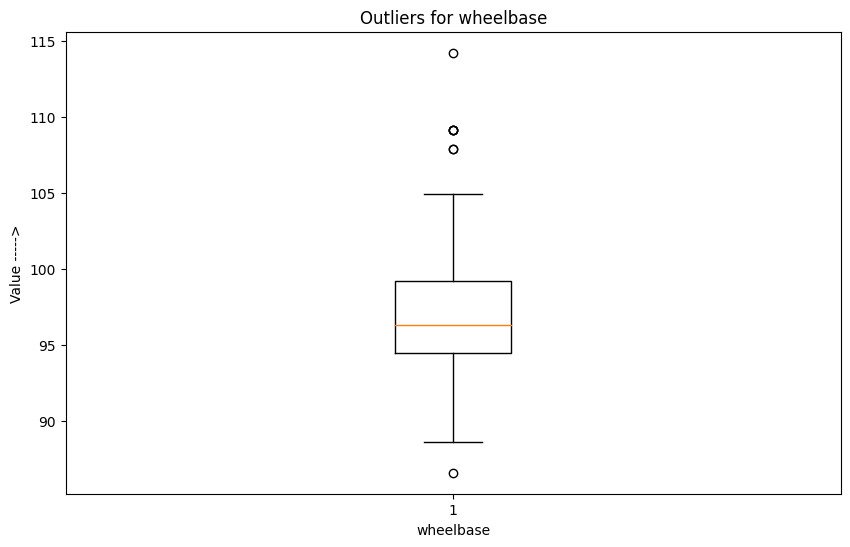

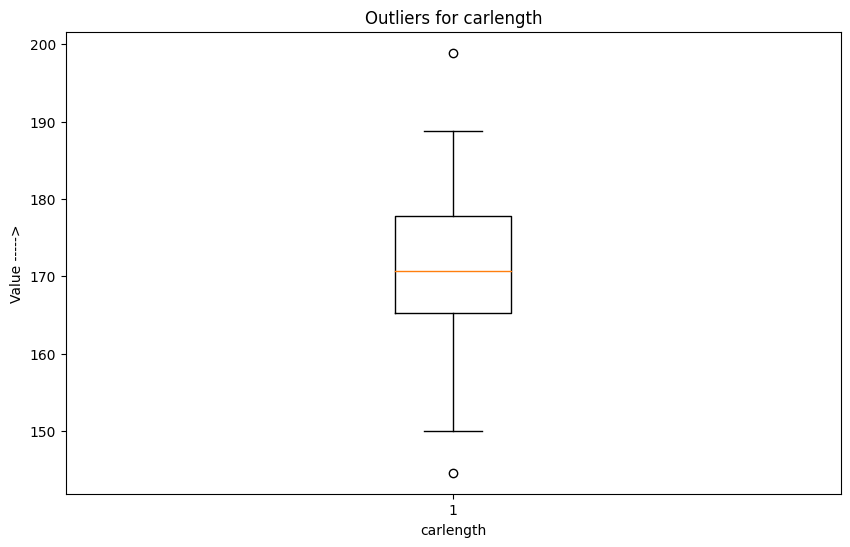

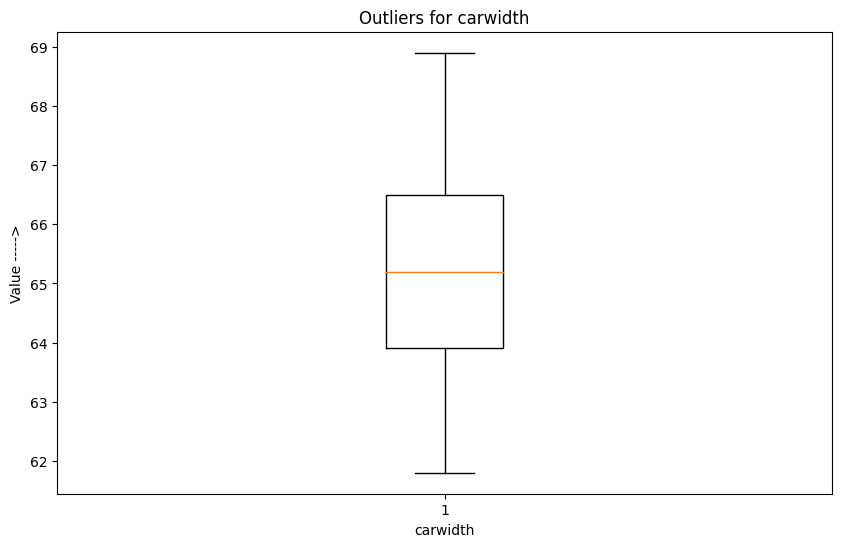

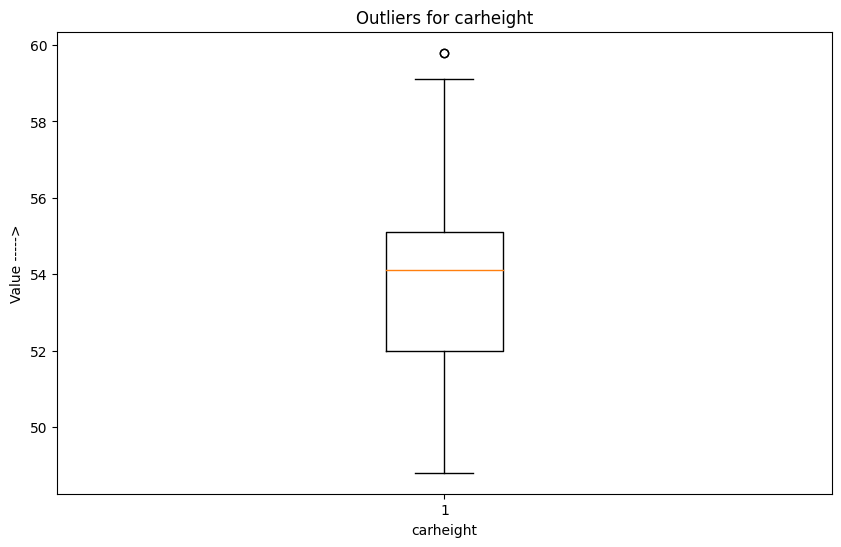

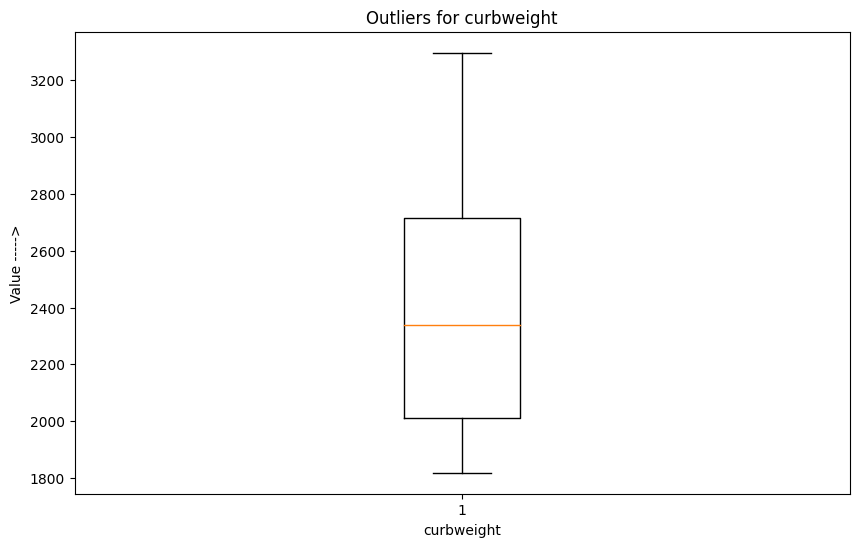

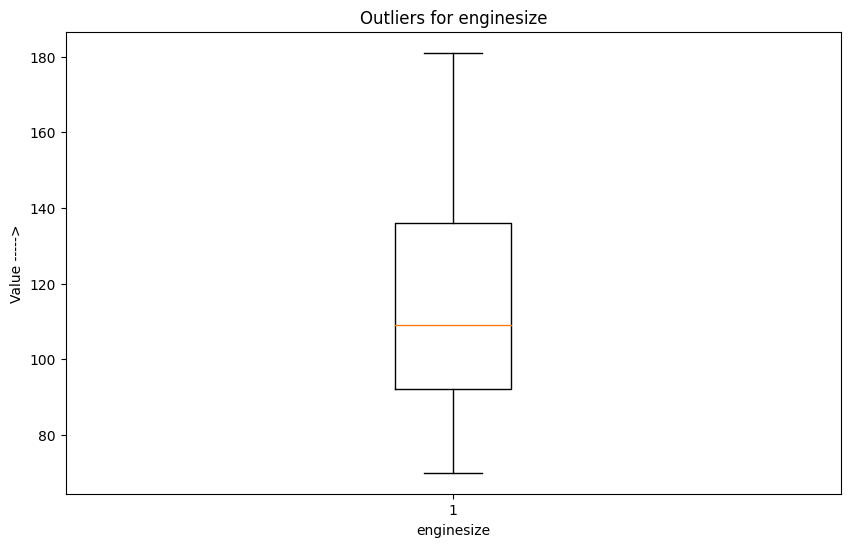

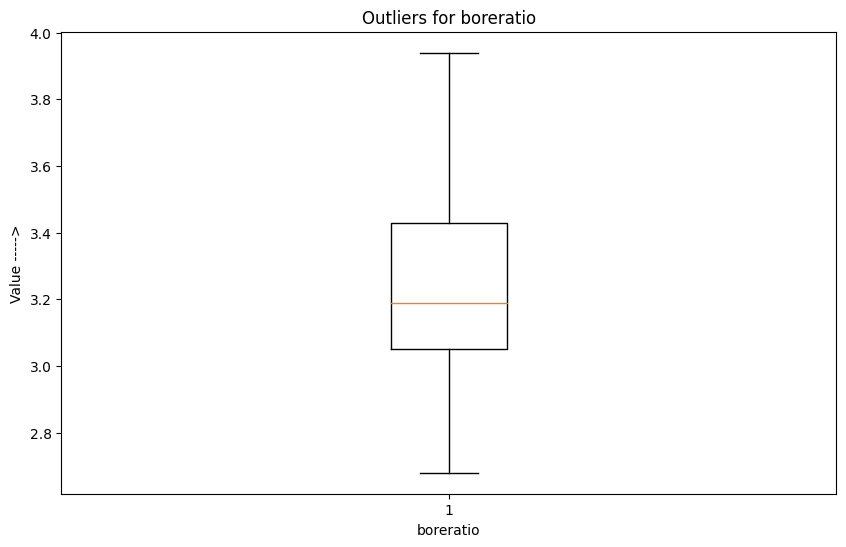

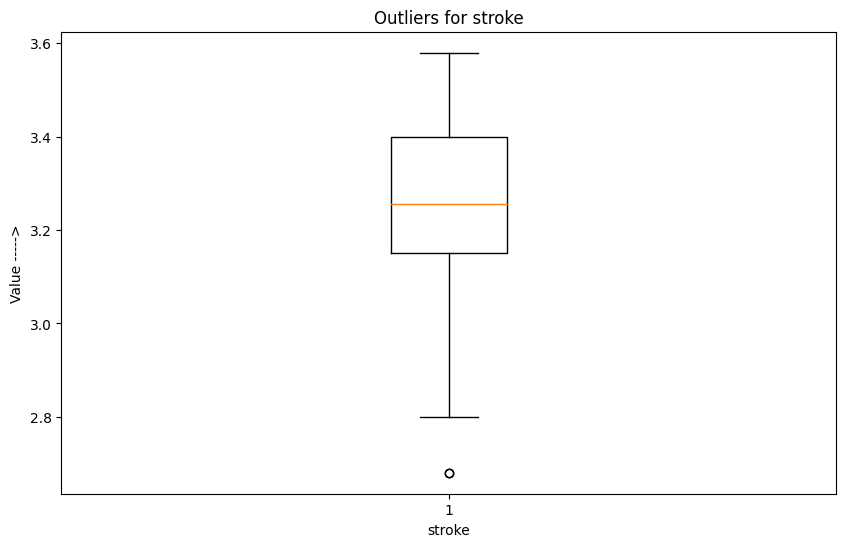

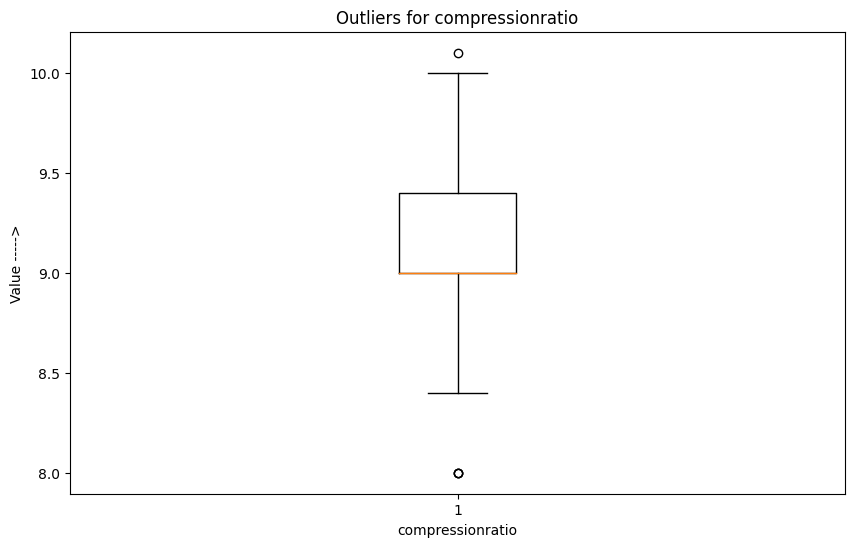

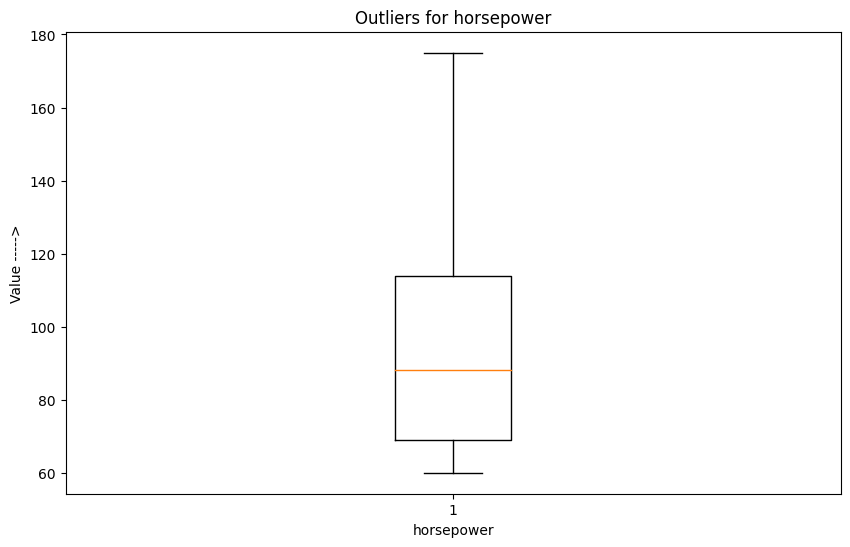

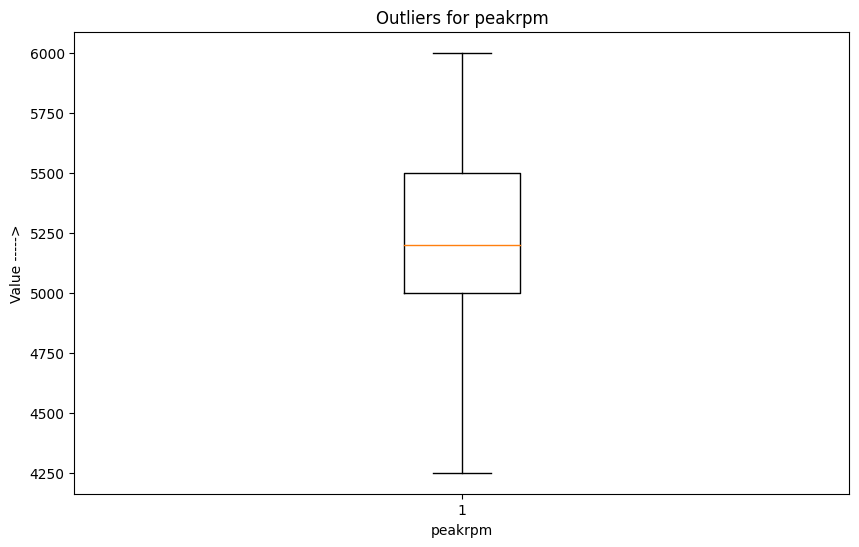

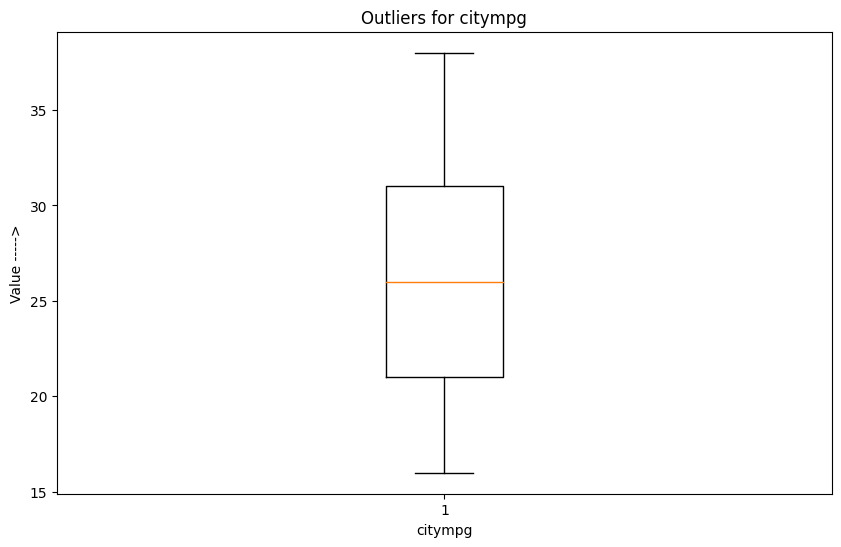

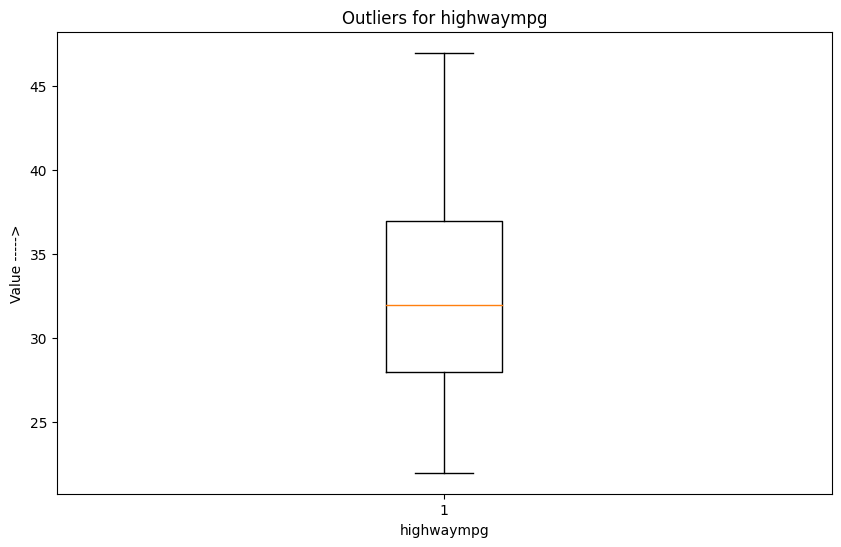

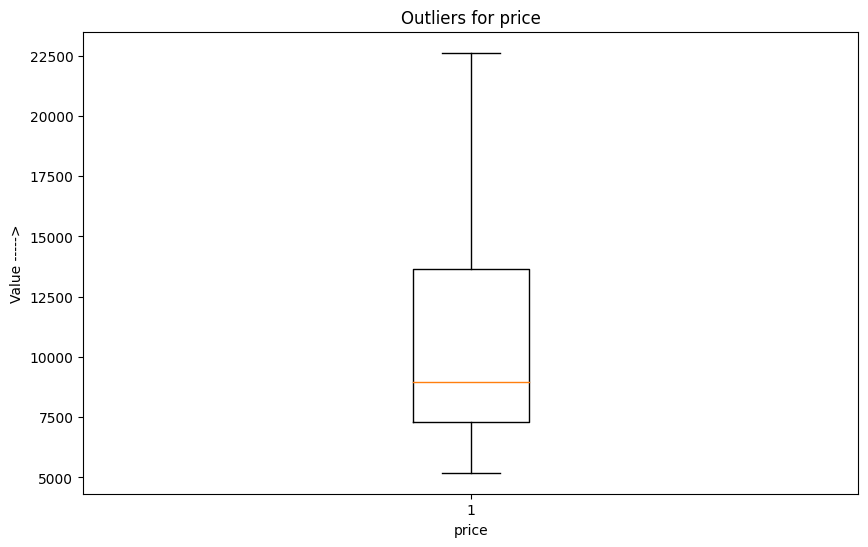

In [72]:
outlier_detection(car[numerical_col(car)])

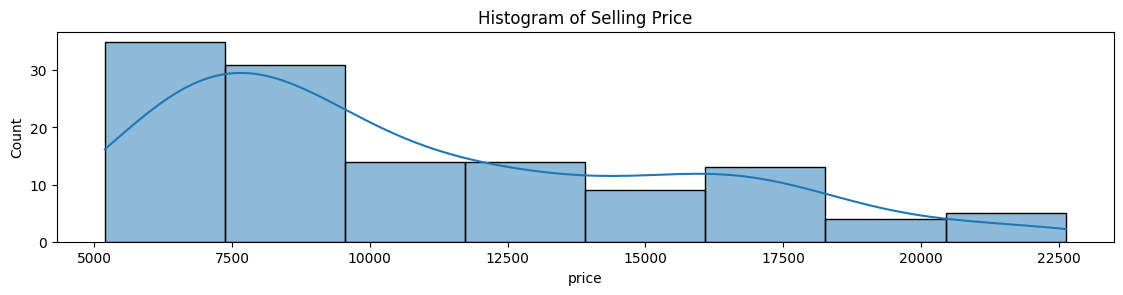

In [73]:
# Histogram of Selling Price
plt.figure(figsize=(30, 6))
plt.subplot(2, 2, 1)
sns.histplot(car['price'], kde=True)
plt.title('Histogram of Selling Price');

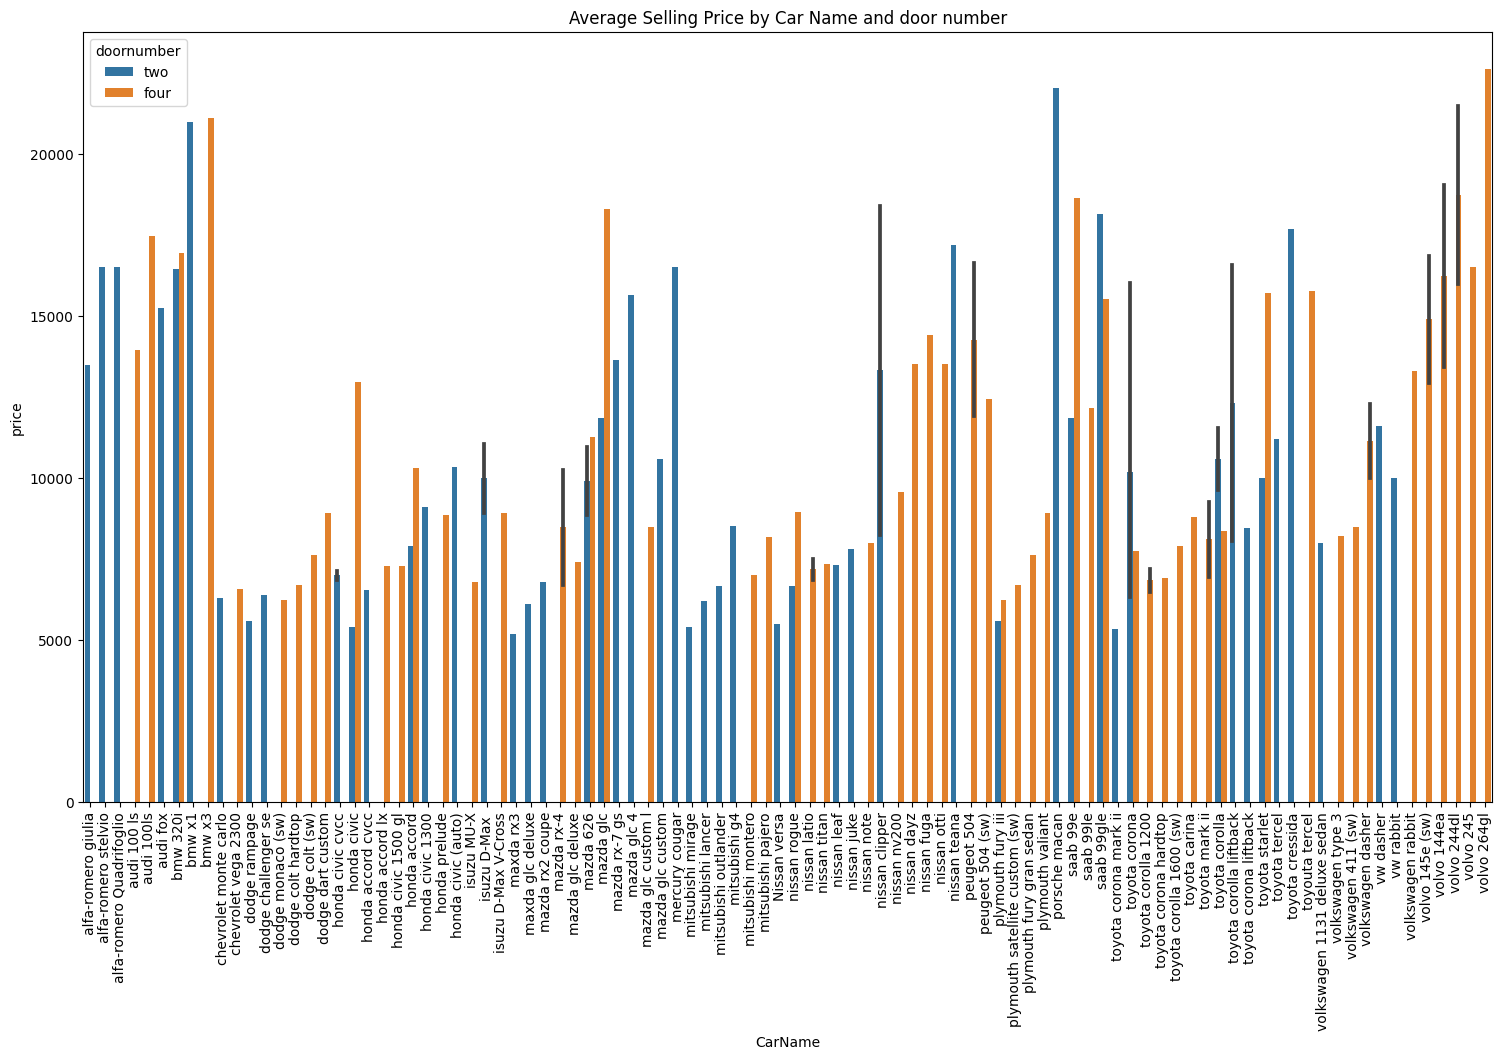

In [74]:
# Average Selling Price by Car Name and Transmission
plt.figure(figsize=(40, 10))
plt.subplot(1, 2, 2)
sns.barplot(x='CarName', y='price', hue='doornumber', data=car)
plt.xticks(rotation=90)
plt.title('Average Selling Price by Car Name and door number');

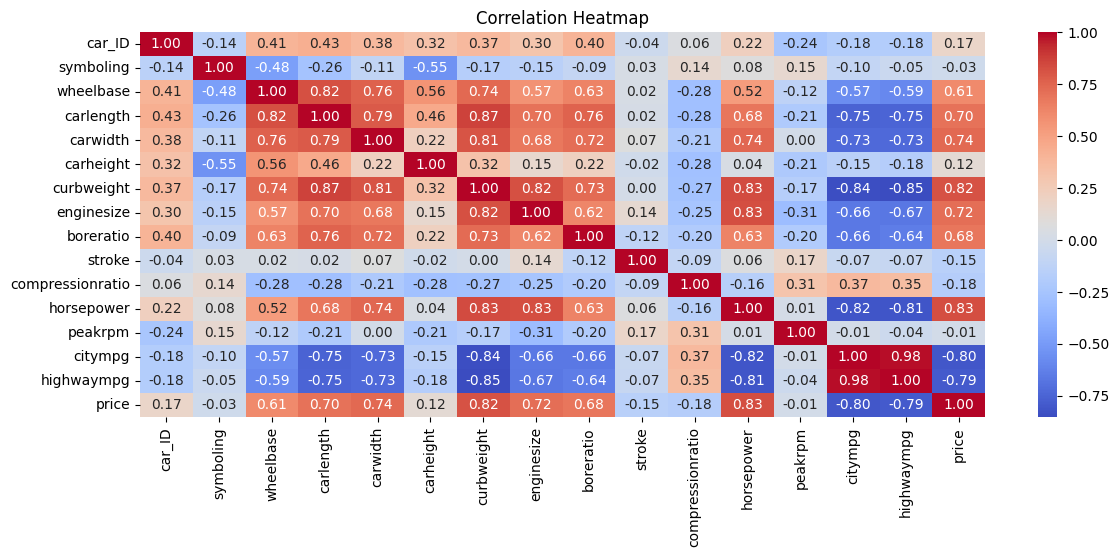

In [75]:
# Correlation Heatmap
plt.figure(figsize=(30, 5))
plt.subplot(1, 2, 2)
sns.heatmap(car.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap');


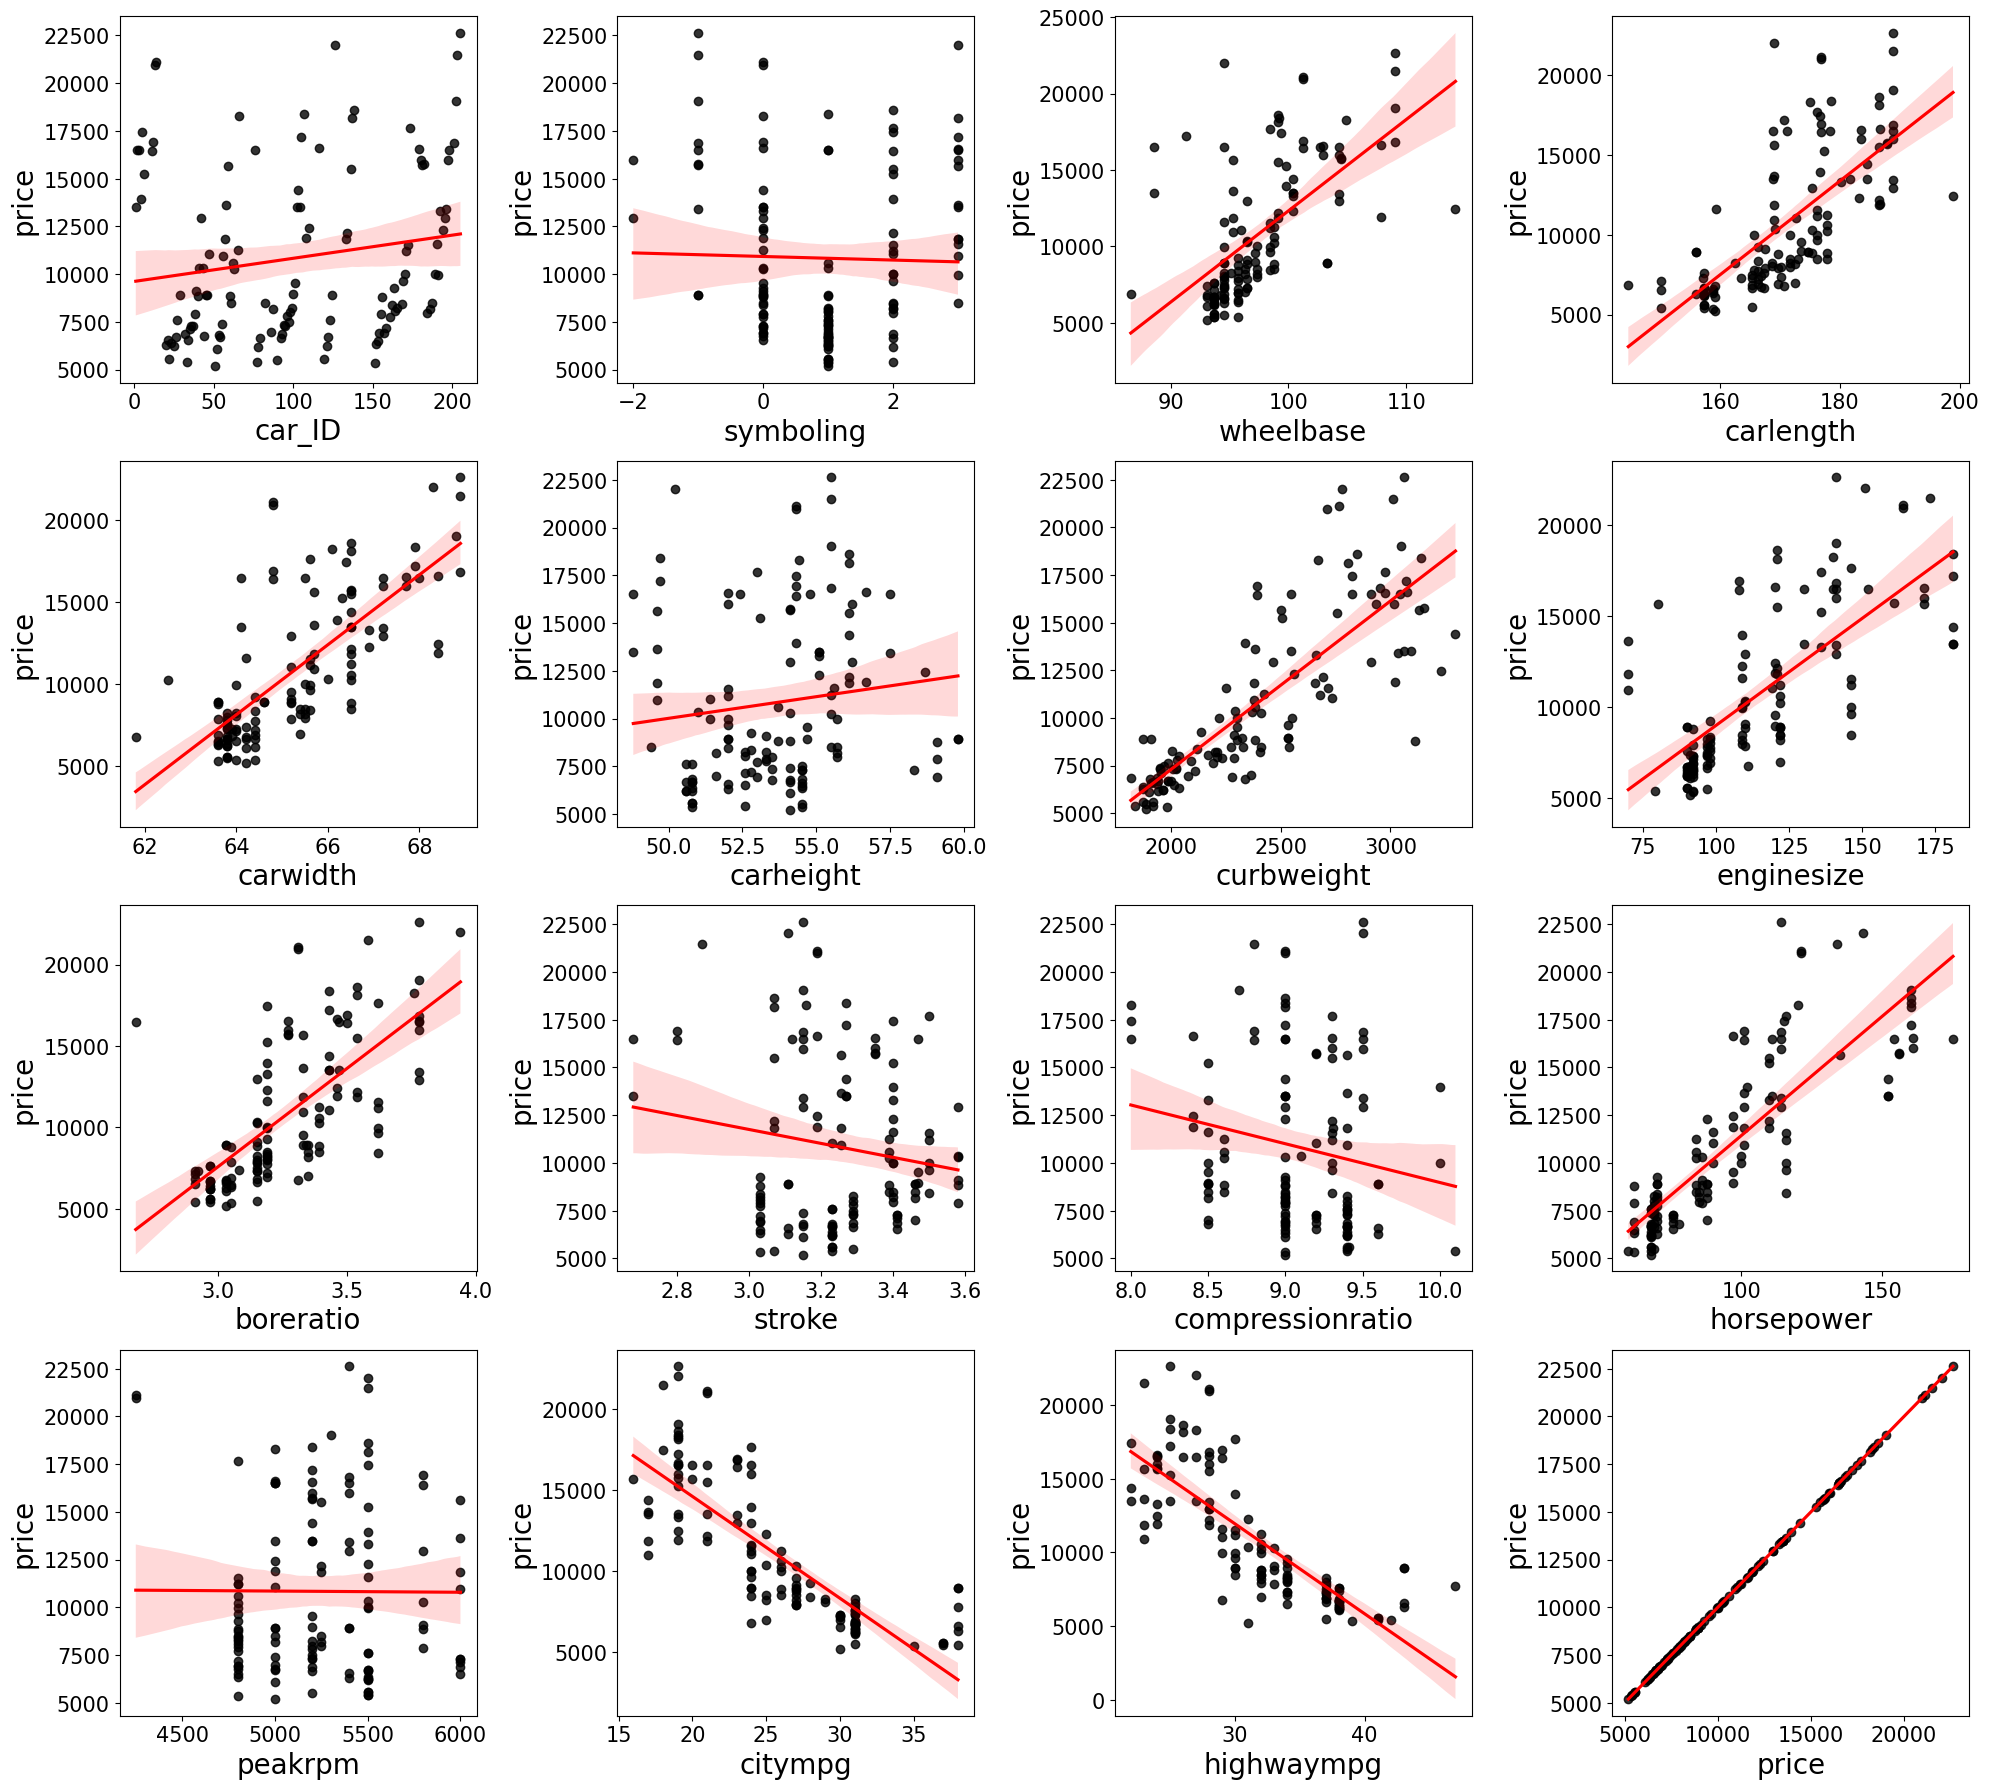

In [76]:
# plotting regression subplots for every numerical column with respect to our target variable "Selling_Price" just to check the relationship between them
numeric_cols = car[numerical_col(car)]
fig, axs = plt.subplots(4, 4, figsize=(20,18), facecolor="white")
axs = axs.ravel()
for i, col in enumerate(numeric_cols.columns):
    sns.regplot(x=col, y="price", data=numeric_cols, ax=axs[i], scatter_kws={"color": "black"}, line_kws={"color": "red"})
    axs[i].tick_params(axis='x', colors='black', labelsize=15)
    axs[i].tick_params(axis='y', colors='black', labelsize=15)
    axs[i].set_xlabel(col, color='black', fontsize=20)
    axs[i].set_ylabel("price", color='black', fontsize=20)
plt.tight_layout()
plt.show()


In [77]:
# Apply one-hot encoding to categorical features
cars = pd.get_dummies(car, drop_first=True)

# **Random Forest with GridSearchCV**

In [78]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
x = cars.drop('price', axis=1)
y = cars['price']

In [79]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Random Forest Regressor
rf = RandomForestRegressor()

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

In [80]:
# GridSearchCV with Random Forest Regressor
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model to the training data
grid_search.fit(x_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [117]:
best_rf = grid_search.best_estimator_
# Predict on the test set
y_pred = best_rf.predict(x_test)

# Evaluation metrics

r2 = r2_score(y_test, y_pred)

from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f'Mean Absolute Error for test data : {mean_absolute_error(y_test,y_pred)}')
print(f'Mean Squared Error for test data : {mean_squared_error(y_test,y_pred)}')
print(f'Root Mean Squared Error for test data : {np.sqrt(mean_squared_error(y_test,y_pred))}')
print(f'R_square for test data : {r2}')


Mean Absolute Error for test data : 1125.8313
Mean Squared Error for test data : 2124787.50366625
Root Mean Squared Error for test data : 1457.6650862479523
R_square for test data : 0.8560708819162983


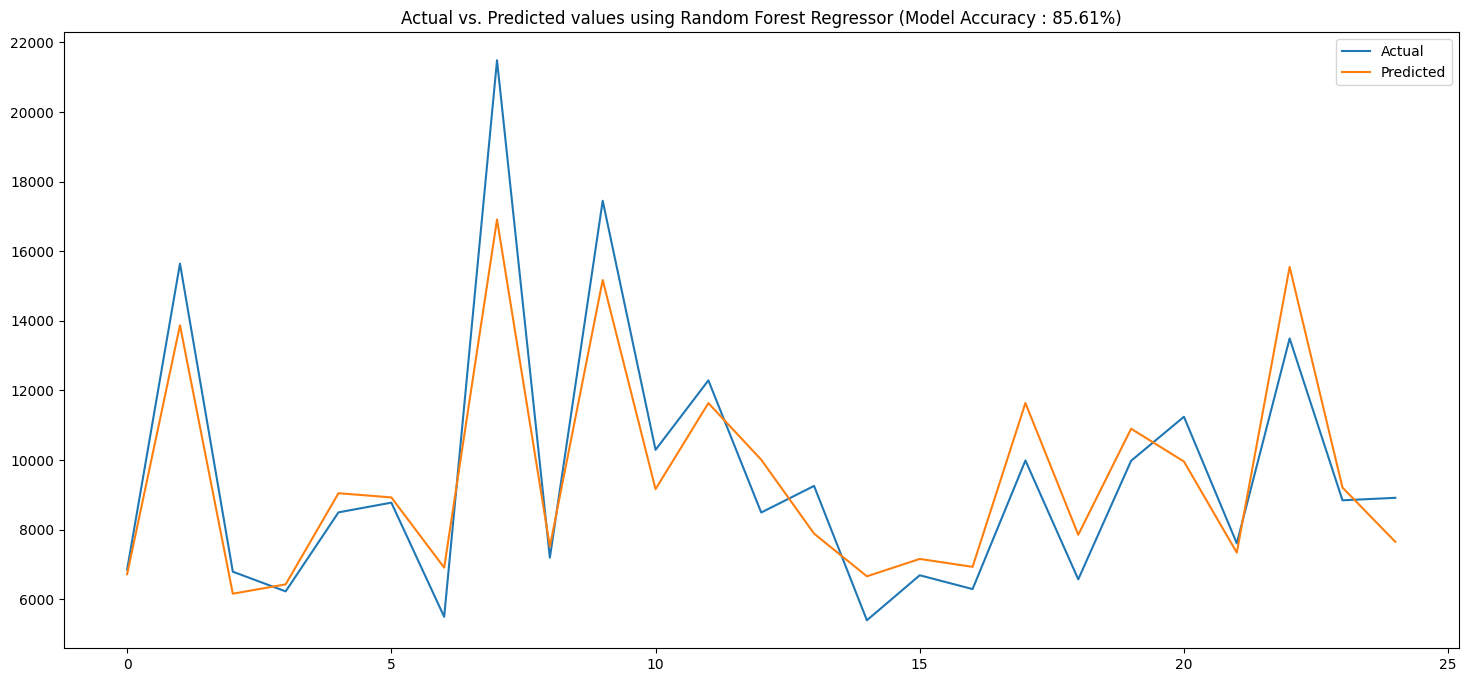

In [82]:
plt.figure(figsize = (18,8))
plt.plot(np.array(y_test[:200]), label='Actual')
plt.plot(np.array(y_pred[:200]), label='Predicted')
plt.title(f'Actual vs. Predicted values using Random Forest Regressor (Model Accuracy : {round(r2*100,2)}%)')
plt.legend()
plt.show()

In [130]:
# Writing a function for training a model and to also check its performance
cv=5 # CV value
r_2 = [] # List for r 2 score
CV = [] # list for CV scores mean

# function for model fitting and testing
def model(algorithm,x_train_,y_train_,x_test_,y_test_):
    algorithm.fit(x_train_,y_train_)
    predicts=algorithm.predict(x_test_)
    prediction=pd.DataFrame(predicts)
    R_2=r2_score(y_test_,prediction)
    cross_val=cross_val_score(algorithm,x_train_,y_train_,cv=cv)

    # Appending results to Lists
    r_2.append(R_2)
    CV.append(cross_val.mean())

    # Evaluation metrics

    r2 = r2_score(y_test, y_pred)

    print(algorithm,"\n")
    print("r_2 score :",R_2,"\n")
    print("CV scores:",cross_val,"\n")
    print("CV scores mean:",cross_val.mean())
    print(f'Mean Absolute Error for test data : {mean_absolute_error(y_test_,predicts)}')
    print(f'Mean Squared Error for test data : {mean_squared_error(y_test_,predicts)}')
    print(f'Root Mean Squared Error for test data : {np.sqrt(mean_squared_error(y_test,predicts))}')
    print(f'R_square for test data : {r2}')

    # Plot for actual vs prediction
    test_index=y_test_.reset_index()["price"]
    ax=test_index.plot(label="Actual",figsize=(12,6),linewidth=2,color="b")
    ax=prediction[0].plot(label = "Prediction",figsize=(12,6),linewidth=2,color="y")
    plt.legend(loc='upper right')
    plt.title("Actual VS Prediction")
    plt.ylabel("values")
    plt.show()

RandomForestRegressor() 

r_2 score : 0.8777273210046213 

CV scores: [0.83137977 0.85974189 0.82179361 0.82030921 0.74361434] 

CV scores mean: 0.8153677645776275
Mean Absolute Error for test data : 1038.8186
Mean Squared Error for test data : 1805079.221135
Root Mean Squared Error for test data : 1343.53236698451
R_square for test data : 0.8560708819162983


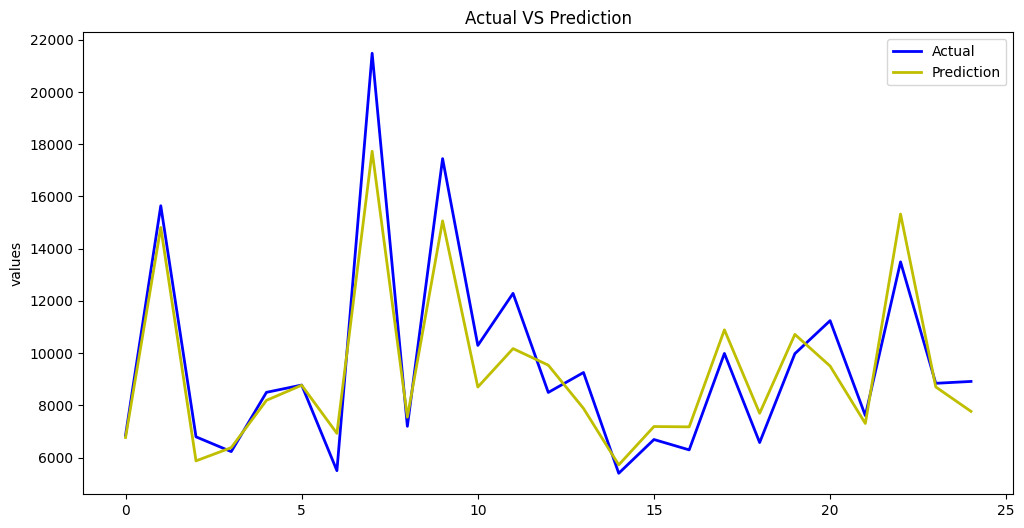

In [131]:
#applying the above function
model(rf,x_train,y_train,x_test,y_test)

# **XGBoost with GridSearchCV**

In [132]:
from xgboost import XGBRegressor
# XGBoost Regressor
xgb = XGBRegressor()

In [133]:
param_grid = {
    'n_estimators': [50, 100, 150],   # Number of boosting rounds
    'learning_rate': [0.1, 0.01, 0.001],  # Step size shrinkage to prevent overfitting
    'max_depth': [3, 5, 7]  # Maximum depth of a tree
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
# Fit the model to find the best hyperparameters
grid_search.fit(x_train, y_train)



GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [134]:
# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=50, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) 

r_2 score : 0.8490353398508652 

CV scores: [0.9004282  0.87613526 0.8805561  0.73944145 0.69656207] 

CV scores mean: 0.8186246149761522
Mean Absolute Error for test data : 1160.428671875
Mean Squared Error for test data : 2228651.3504068186
Root Mean Squared E

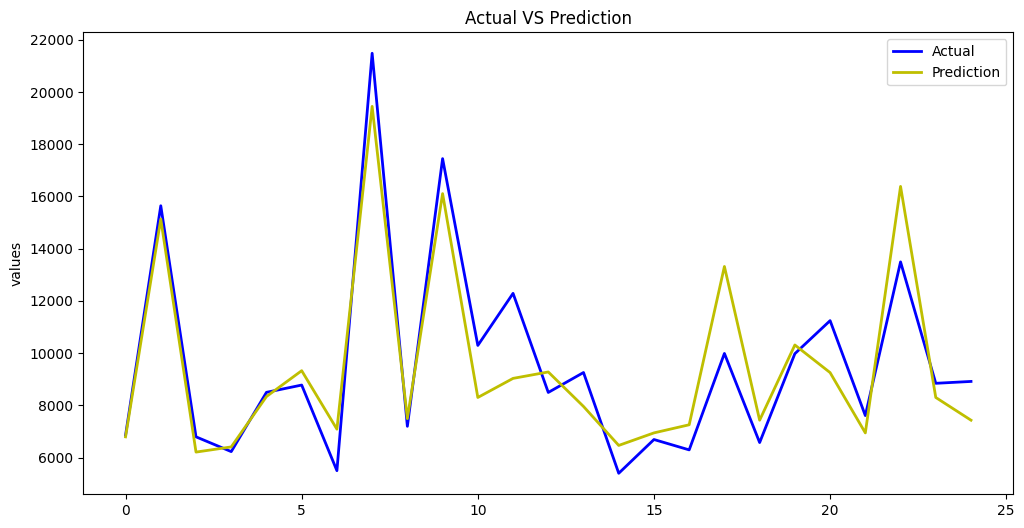

In [135]:
model(best_model,x_train,y_train,x_test,y_test)

# **Decision Tree with GridSearchCV**

In [136]:
from sklearn.tree import DecisionTreeRegressor
# Decision Tree Regressor
dt = DecisionTreeRegressor()

In [137]:
# Define the hyperparameter grid to search
param_grid = {
    'criterion': ['mse', 'friedman_mse', 'mae'],  # Function to measure the quality of a split
    'max_depth': [None, 5, 10, 15],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}
# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
# Fit the model to find the best hyperparameters
grid_search.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [128]:
# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model_dt = grid_search.best_estimator_


DecisionTreeRegressor(criterion='friedman_mse', max_depth=10,
                      min_samples_split=5) 

r_2 score : 0.754650841250705 

CV scores: [0.82618525 0.84628491 0.81734368 0.6809457  0.63359211] 

CV scores mean: 0.7608703309748729
Mean Absolute Error for test data : 1425.8033333333335
Mean Squared Error for test data : 3622024.740277778
Root Mean Squared Error for test data : 1903.161774594524
R_square for test data : 0.8560708819162983


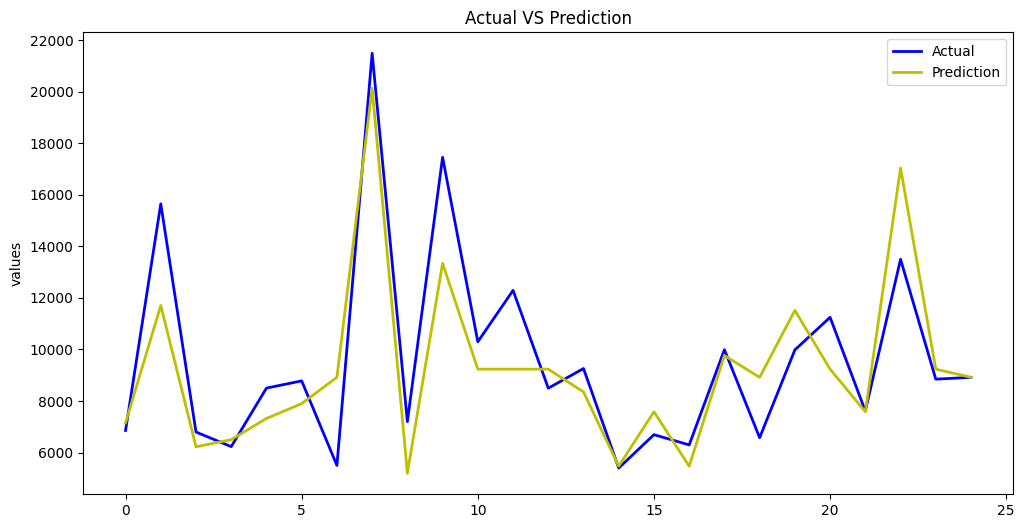

In [129]:
model(best_model_dt,x_train,y_train,x_test,y_test)